# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction of Data 👋</div>

The [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) dataset contains 320K rows and 18 columns. It is a cleaned, smaller version of the 2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults. For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions. Below is a description of the features collected for each patient: 


| # | Feature | Description
| --- | --- | --- 
| 1 | HeartDisease | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
| 2 | BMI | Body Mass Index (BMI)
| 3 | Smoking | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
| 4 | AlcoholDrinking | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
| 5 | Stroke | (Ever told) (you had) a stroke?
| 6 | PhysicalHealth | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 
| 7 | MentalHealth | Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
| 8 | DiffWalking | Do you have serious difficulty walking or climbing stairs?
| 9 | Sex | Are you male or female?
| 10 | AgeCategory | Fourteen-level age category
| 11 | Race | Imputed race/ethnicity value
| 12 | Diabetic | (Ever told) (you had) diabetes?
| 13 | PhysicalActivity | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
| 14 | GenHealth | Would you say that in general your health is...
| 15 | SleepTime | On average, how many hours of sleep do you get in a 24-hour period?
| 16 | Asthma | (Ever told) (you had) asthma?
| 17 | KidneyDisease | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
| 18 | SkinCancer | (Ever told) (you had) skin cancer?

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Read and Analasis the  Data 👋</div>

**Import the important library** 

In [3]:
!pip install imbalanced-learn
 

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 1.0 MB/s eta 0:00:0000:0100:01


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde, gaussian_kde
from matplotlib import gridspec
from sklearn.preprocessing import LabelEncoder , StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split 

**Read data by pd.read_csv from pandas and save it in df**

In [6]:
# Import Dataset
df = pd.read_csv('data/heart_2020_cleaned.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


**Show informations about the data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

**Describe the numerical  columns**

In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


*  **BMI** - **min**.: 12; **max**.: 94.8 - with a BMI of 94.8, a person must be extremely morbidly obese (which is not that extremely improbable, given the prevalence of obesity in the US);
* (**PhysicalHealth**, **MentalHealth**) - there is a daily scale, from 0 to 30 days, **outliers** are hard to find here
*  **SleepTime** - we can see that the mean as well as the median are quite close to each other: the average sleep time of the respondents is between 7 and 8 hours, but we also have strange answers, such as 1 hour or 24 hours, which doesn't seem to be possible. When excluding these values, you can use the interquartile range, exclude 5% of extreme observations or use some statistical tests to determine whether a certain observation is an outlier.
* **BMI** more than 60-70 is highly implausible. You may create a cap here to prevent unnecessary influence.
*  **SleepTime ,PhysicalHealth and  MentalHealth** are considered as continuous only integers, so we can treat them as discontinuous.
* **GenHealth** attribute is a measure of an individual's overall health. It is calculated by taking into account a variety of factors, including height, weight, age, sex, and lifestyle choices.




In [9]:
############convert "SleepTime", "PhysicalHealth" and "MentalHealth" dtypes to category
# df['SleepTime'] = df['SleepTime'].astype('object')
# df['PhysicalHealth'] = df['PhysicalHealth'].astype('object')
# df['MentalHealth'] = df['MentalHealth'].astype('object')

**Unique values in every coulmns**

In [10]:
for col_n in df.columns:
    unq_val = len(df[col_n].unique())
    print("Feature '{col_n}' has '{unq_val}' unique values".format(col_n = col_n, unq_val=unq_val))


Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


#### Shape the data

#### ------------Shape------------

In [11]:
print("------------Shape------------")
print(df.shape)

------------Shape------------
(319795, 18)


#### --------------Null--------------

In [12]:
print("------------Null------------")
print(df.isnull().sum())

------------Null------------
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


#### --------------NAN--------------

In [13]:
print("------------NAN------------")
print(df.isna().sum())

------------NAN------------
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [14]:
# Get Information for Features and unique values in columns
for feature in df.columns:
    print(feature)
    print(df[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 


**Ckeck duplicated rows**

In [21]:
df.duplicated().sum()

18078

**Heart Disease**

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='HeartDisease', ylabel='count'>

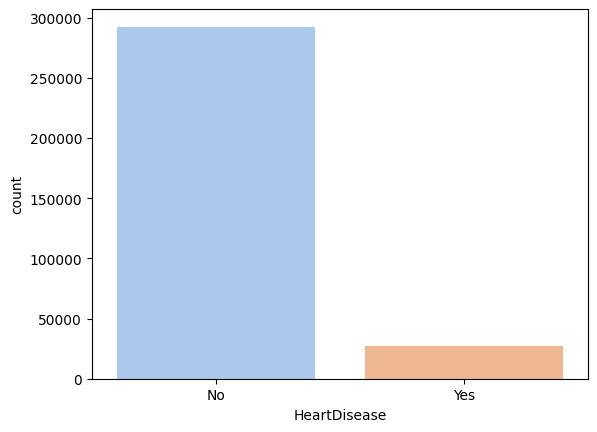

In [22]:
#the distribution of the target variable
sns.countplot(x='HeartDisease',data=df,palette='pastel')

Since the data is unbalanced (292422 people don't have heart disease and 27373 people have heart disease), these bar graphs do not help us to understand the data well (The same is true for all features). Investigating among the people having heart disease could be a better strategy to understand the effect of a certain feature on this topic so the following graphs were prepared considering this fact.

In [23]:
df.HeartDisease.value_counts()
# The Percentile of people who have Heart Disease
No_Value = df.HeartDisease.value_counts()[0]
Yes_Value = df.HeartDisease.value_counts()[1]
print("The number of People that have Heart Disease is ", Yes_Value , " and have Percentage Value {}%".format(((Yes_Value/len(df))*100).round(2)))
print("The number of People that do not have Heart Disease is ", No_Value , " and have Percentage Value {}%".format(((No_Value/len(df))*100).round(2)))

The number of People that have Heart Disease is  27373  and have Percentage Value 8.56%
The number of People that do not have Heart Disease is  292422  and have Percentage Value 91.44%


/tmp/ipykernel_2360/1789735448.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  No_Value = df.HeartDisease.value_counts()[0]
/tmp/ipykernel_2360/1789735448.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Yes_Value = df.HeartDisease.value_counts()[1]


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Visualization 👋</div>

Plot numeric column

/tmp/ipykernel_2360/472015837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["BMI"],hist=True)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

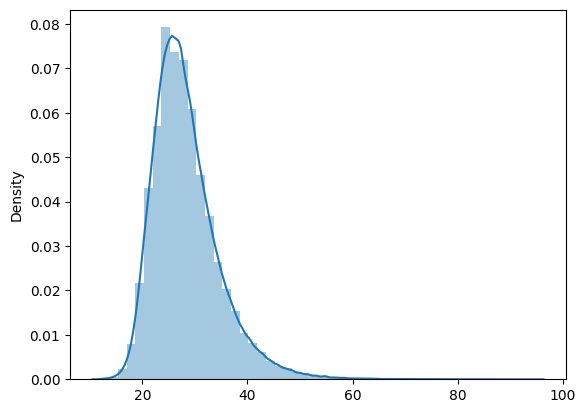

In [24]:
sns.distplot(x=df["BMI"],hist=True) 

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='HeartDisease', ylabel='BMI'>

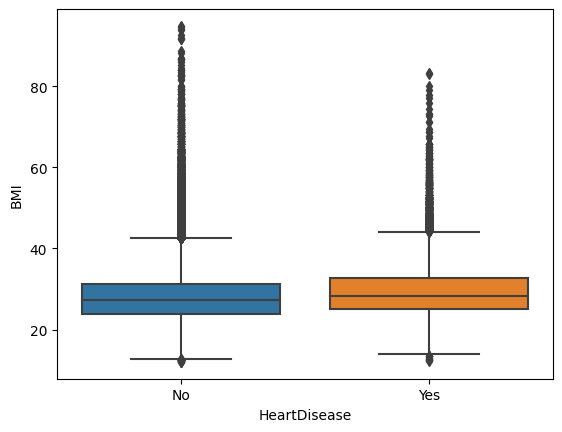

In [25]:
sns.boxplot(y=df["BMI"], x=df["HeartDisease"])

In [26]:
def detect_outlier(col):
    IQR = df[col].quantile(.75) - df[col].quantile(.25)
    max_whiskers = df[col].quantile(.75) + (IQR*1.5)
    min_whiskers = df[col].quantile(.25) - (IQR*1.5)
    return df[(df[col]<max_whiskers) & (df[col]>min_whiskers)]

In [27]:
df = detect_outlier('BMI')

/tmp/ipykernel_2360/2059854556.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["BMI"],hist=True)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

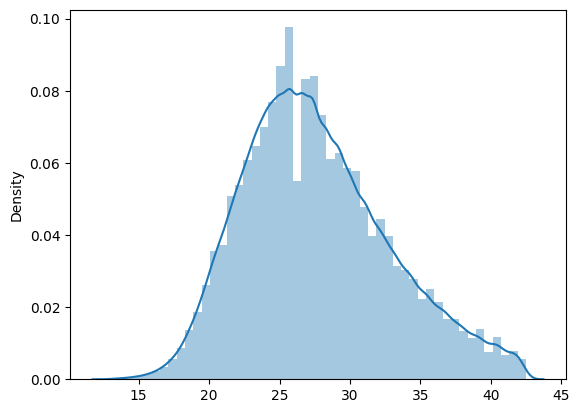

In [28]:
sns.distplot(x=df["BMI"],hist=True)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='HeartDisease', ylabel='BMI'>

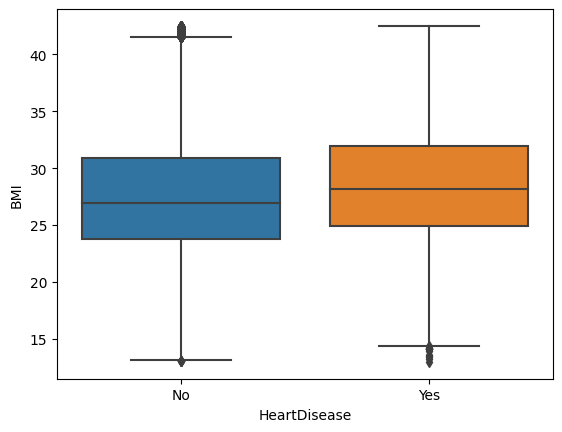

In [29]:
sns.boxplot(y=df["BMI"], x=df["HeartDisease"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

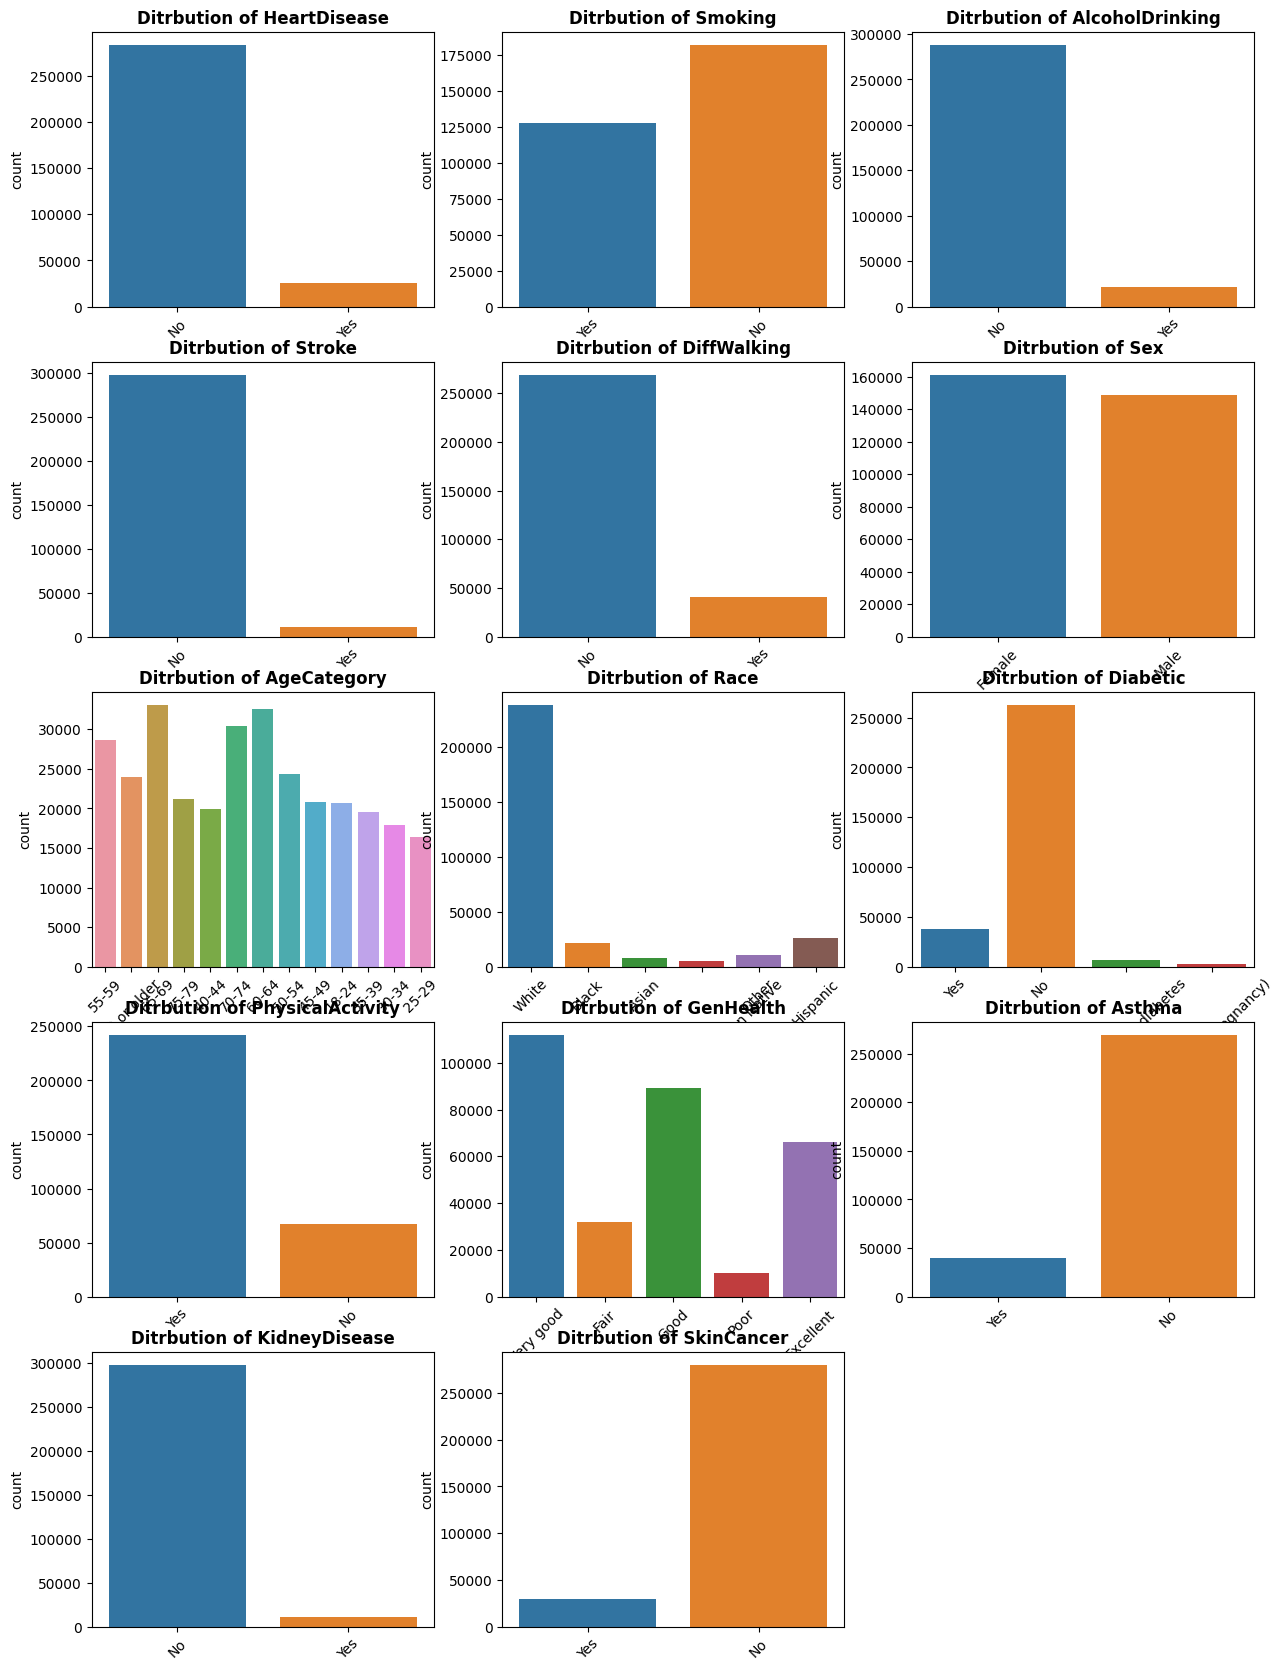

In [30]:
i=1
plt.figure(figsize=(15,25))
for col in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,i)
    plt.xticks(rotation=45)
    sns.countplot(x=col,data=df)
    plt.title(f"Ditrbution of {col}",weight='bold')
    plt.xlabel('')
    i+=1

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

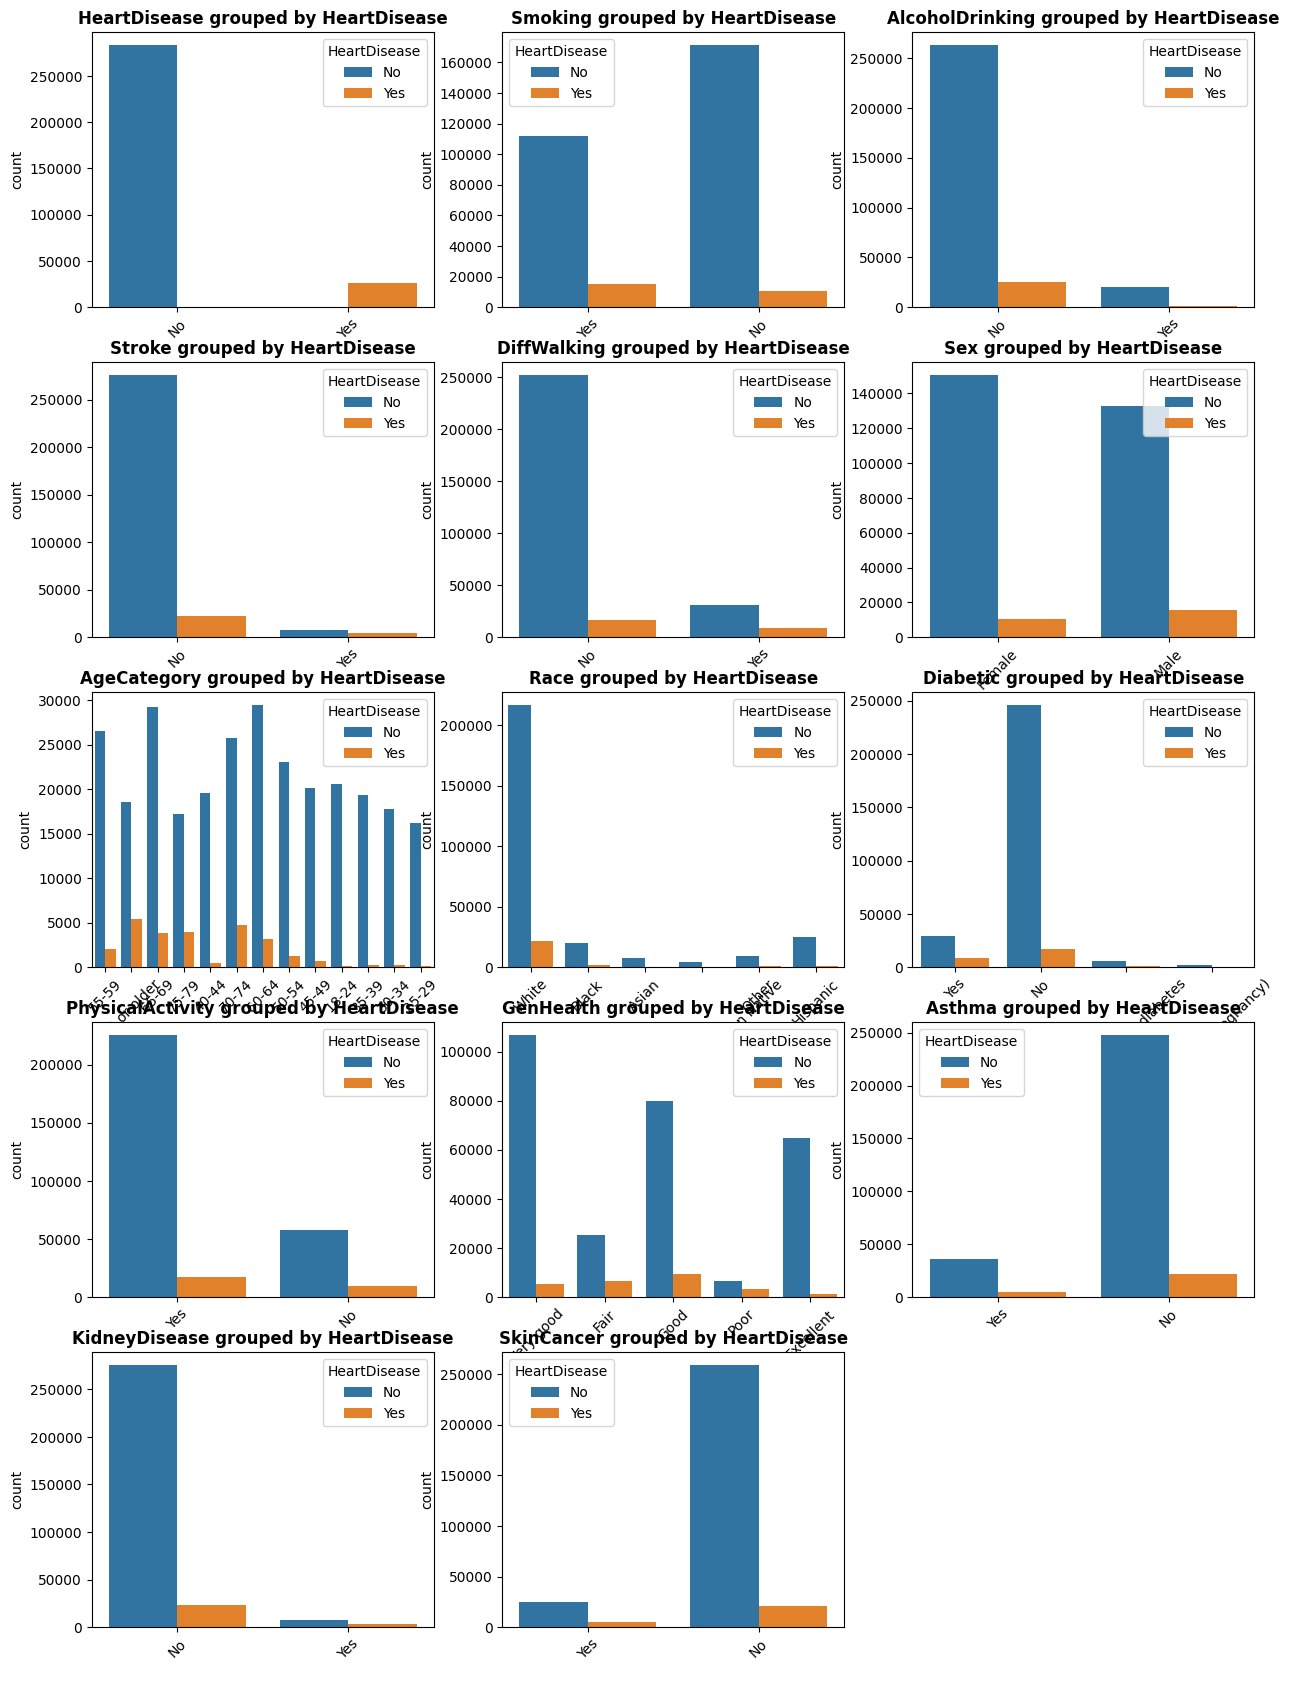

In [31]:
i=1
plt.figure(figsize=(15,25))
for col in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,i)
    plt.xticks(rotation=45)
    sns.countplot(x=col,data=df,hue='HeartDisease')
    plt.title(f"{col} grouped by HeartDisease",fontweight='bold')
    plt.xlabel(' ')
    i+=1



we can see from above charts:
1.   number of people they smoking and have heart disease is more than they don't
2.   number of people they don't drink alcohol and have heart disease is more than they don't
3.   males have heart disease more than females
4.   people who have difficulty walking can have heart disease more than don't
5.   people who have stroke can have heart disease more than don't
6.  people older than 40 years old can have heart disease more than others
7.   Gen health for most people is very good and all can have heart disease in equal proportions
8.  People who are not physically active can get heart disease more than others










Correlation among features